In [45]:
import numpy as np
import pandas as pd

In [107]:
df = pd.read_csv('placement-dataset.csv')

In [141]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [110]:
df = df.iloc[:,1:]

In [111]:
df.shape

(100, 3)

In [115]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [99]:
# Steps
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. scale the values
# 3. Train test split -> coress validation
# 4. Train the model  
# 5. Evluate the model/model selection
# 6. Deploy the model

In [112]:
# How to remove the any columns
# df.iloc[:,1:] this is the way to remove the column

In [116]:
import matplotlib.pyplot as plt

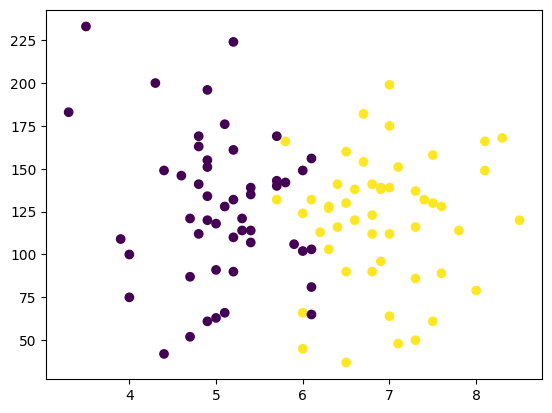

In [118]:
plt.scatter(df['cgpa'],df['iq'],c= df['placement'])

In [119]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [120]:
from sklearn.model_selection import  train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [121]:
from sklearn.preprocessing import  StandardScaler

In [122]:
scaler = StandardScaler()

In [123]:
x_train = scaler.fit_transform(x_train)

In [124]:
x_train

array([[-0.80490407,  0.0515007 ],
       [ 0.40677948, -2.21619147],
       [ 0.06058418,  0.74925214],
       [ 0.8395236 ,  0.32561734],
       [-0.89145289, -0.87052798],
       [ 0.75297477,  0.30069764],
       [-0.80490407,  1.24764602],
       [-0.63180642, -0.12293716],
       [-1.15109937, -0.12293716],
       [ 0.57987713,  1.39716419],
       [-1.41074584,  0.57481428],
       [-0.97800172,  0.20101887],
       [ 0.66642595,  0.37545673],
       [ 0.92607242, -1.94207483],
       [ 2.13775597, -0.14785685],
       [ 0.06058418, -1.51844003],
       [ 0.92607242,  0.62465367],
       [ 1.35881655,  0.0515007 ],
       [-1.06455054,  0.37545673],
       [-0.71835524,  2.44379134],
       [-0.71835524, -0.39705379],
       [ 0.40677948, -0.89544768],
       [ 0.8395236 , -1.54335973],
       [ 0.8395236 ,  1.82079899],
       [ 1.27226772, -1.61811881],
       [-0.28561112,  1.07320816],
       [ 0.23368183,  0.0515007 ],
       [-1.49729467,  1.84571868],
       [ 0.40677948,

In [125]:
x_test = scaler.transform(x_test)

In [126]:
x_test

array([[ 0.75297477, -0.74592951],
       [-0.11251347, -0.49673257],
       [ 0.66642595, -0.07309777],
       [ 0.4933283 ,  0.30069764],
       [-0.80490407, -1.49352034],
       [-0.63180642, -0.29737502],
       [-1.75694114, -1.26924309],
       [-0.28561112,  0.35053703],
       [-1.15109937, -1.84239605],
       [-0.5452576 , -0.29737502]])

In [127]:
from sklearn .linear_model import LogisticRegression

In [128]:
clf = LogisticRegression()

In [129]:
clf.fit(x_train,y_train)

LogisticRegression()

In [132]:
# Eavaluate the model
y_pred = clf.predict(x_test)

In [131]:
y_test

66    1
1     0
0     1
48    1
9     0
46    0
68    0
36    0
94    0
41    0
Name: placement, dtype: int64

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy_score(y_test,y_pred)

1.0

In [137]:
from mlxtend.plotting import  plot_decision_regions

<Axes: >

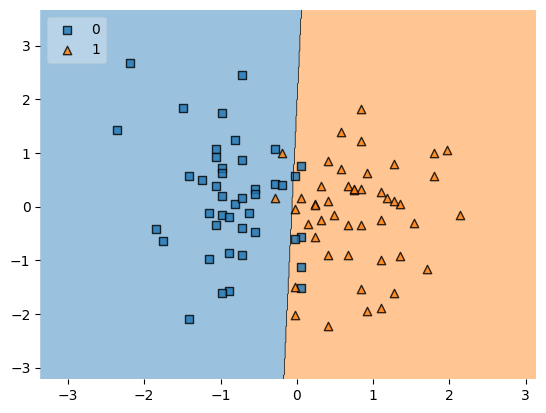

In [138]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [139]:
import pickle

In [140]:
pickle.dump(clf,open('model.pkl','wb'))